In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
data = sm.datasets.sunspots.load_pandas().data
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del data["YEAR"]

warnings.filterwarnings("ignore")

In [5]:
# Застосування моделі ARIMA до часового ряду
model = ARIMA(data, order=(10, 2, 0))
model_fit = model.fit()

In [6]:
# Прогноз
forecast = model_fit.get_prediction(start=pd.to_datetime('2009-01-01'), end=pd.to_datetime('2030-01-01'), dynamic=True, full_results=True)
forecast_conf = forecast.conf_int()

# Збереження значень
forecasted_values = forecast.predicted_mean

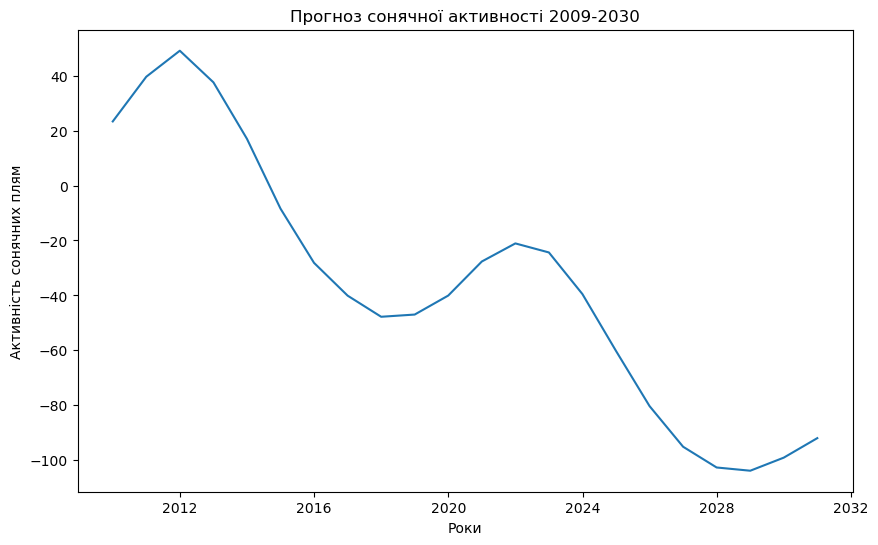

In [7]:
# Візуалізація
plt.figure(figsize=(10,6))
plt.plot(forecasted_values)
plt.title('Прогноз сонячної активності 2009-2030')
plt.xlabel('Роки')
plt.ylabel('Активність сонячних плям')
plt.show()